In [1]:
! pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 4.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [2]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")
sns.set_palette(palette=sns.color_palette("ch:.25",15))
# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter(action='ignore')

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


# <center> 2020 Kaggle ML & DS Survey </center>

<center><img src='https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png' alt="kaggle" style="width: 200px"> </center>

<center> 
Hello everyone!
<br>
<br>
Now I have been studying at masters program and I want to explore my 'colleagues' on the kaggle platform :)
</center>

**<center> what about the data? </center>**


Well, we have 39 (Q1-Q39) questions in main part and 8 (Q26 B- Q375 B) supplementary questions.

Let's exploring some questions from the main part:


Basic part: short description about user

-  Q1: What is your age (# years)?
-  Q2: What is your gender?
-  Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
-  Q5: Select the title most similar to your current role (or most recent title if retired)
-  Q6: For how many years have you been writing code and/or programming?

Programming part: languages 
-  Q7: What programming languages do you use on a regular basis?


Instruments for DS: libs, frameworks and etc
-  Q13: Approximately how many times have you used a TPU (tensor processing unit)?
-  Q14: What data visualization libraries or tools do you use on a regular basis?
-  Q16: Which of the following machine learning frameworks do you use on a regular basis?

Methods: ML, DL, NLP
-  Q15: For how many years have you used machine learning methods?
-  Q17: Which of the following ML algorithms do you use on a regular basis?
-  Q18: Which categories of computer vision methods do you use on a regular basis?
-  Q19: Which of the following natural language processing (NLP) methods do you use on a regular basis?

Work:
-  Q20: What is the size of the company where you are employed?
-  Q22: Does your current employer incorporate machine learning methods into their business?
-  Q23: Select any activities that make up an important part of your role at work:
-  Q24: What is your current yearly compensation ( approximate USD)?

Education topics:
-  Q37: On which platforms have you begun or completed data science courses?
-  Q39: Who/what are your favorite media sources that report on data science topics?

<p> <font size="5" color="red"> will be updated, if u find it useful, please upvote :) </font> </p>

In [3]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
# drop first row
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

# Basic part

<font size="3"> Let's see questions and type of answers for Q1-Q6: </font>

I highlighted the first 6 questions as the basic part, because they give some general idea about a person: age group, gender, who works, how many years programming and etc. Analyzing these factors will help you better understand the user's background and narrow the scope of research.

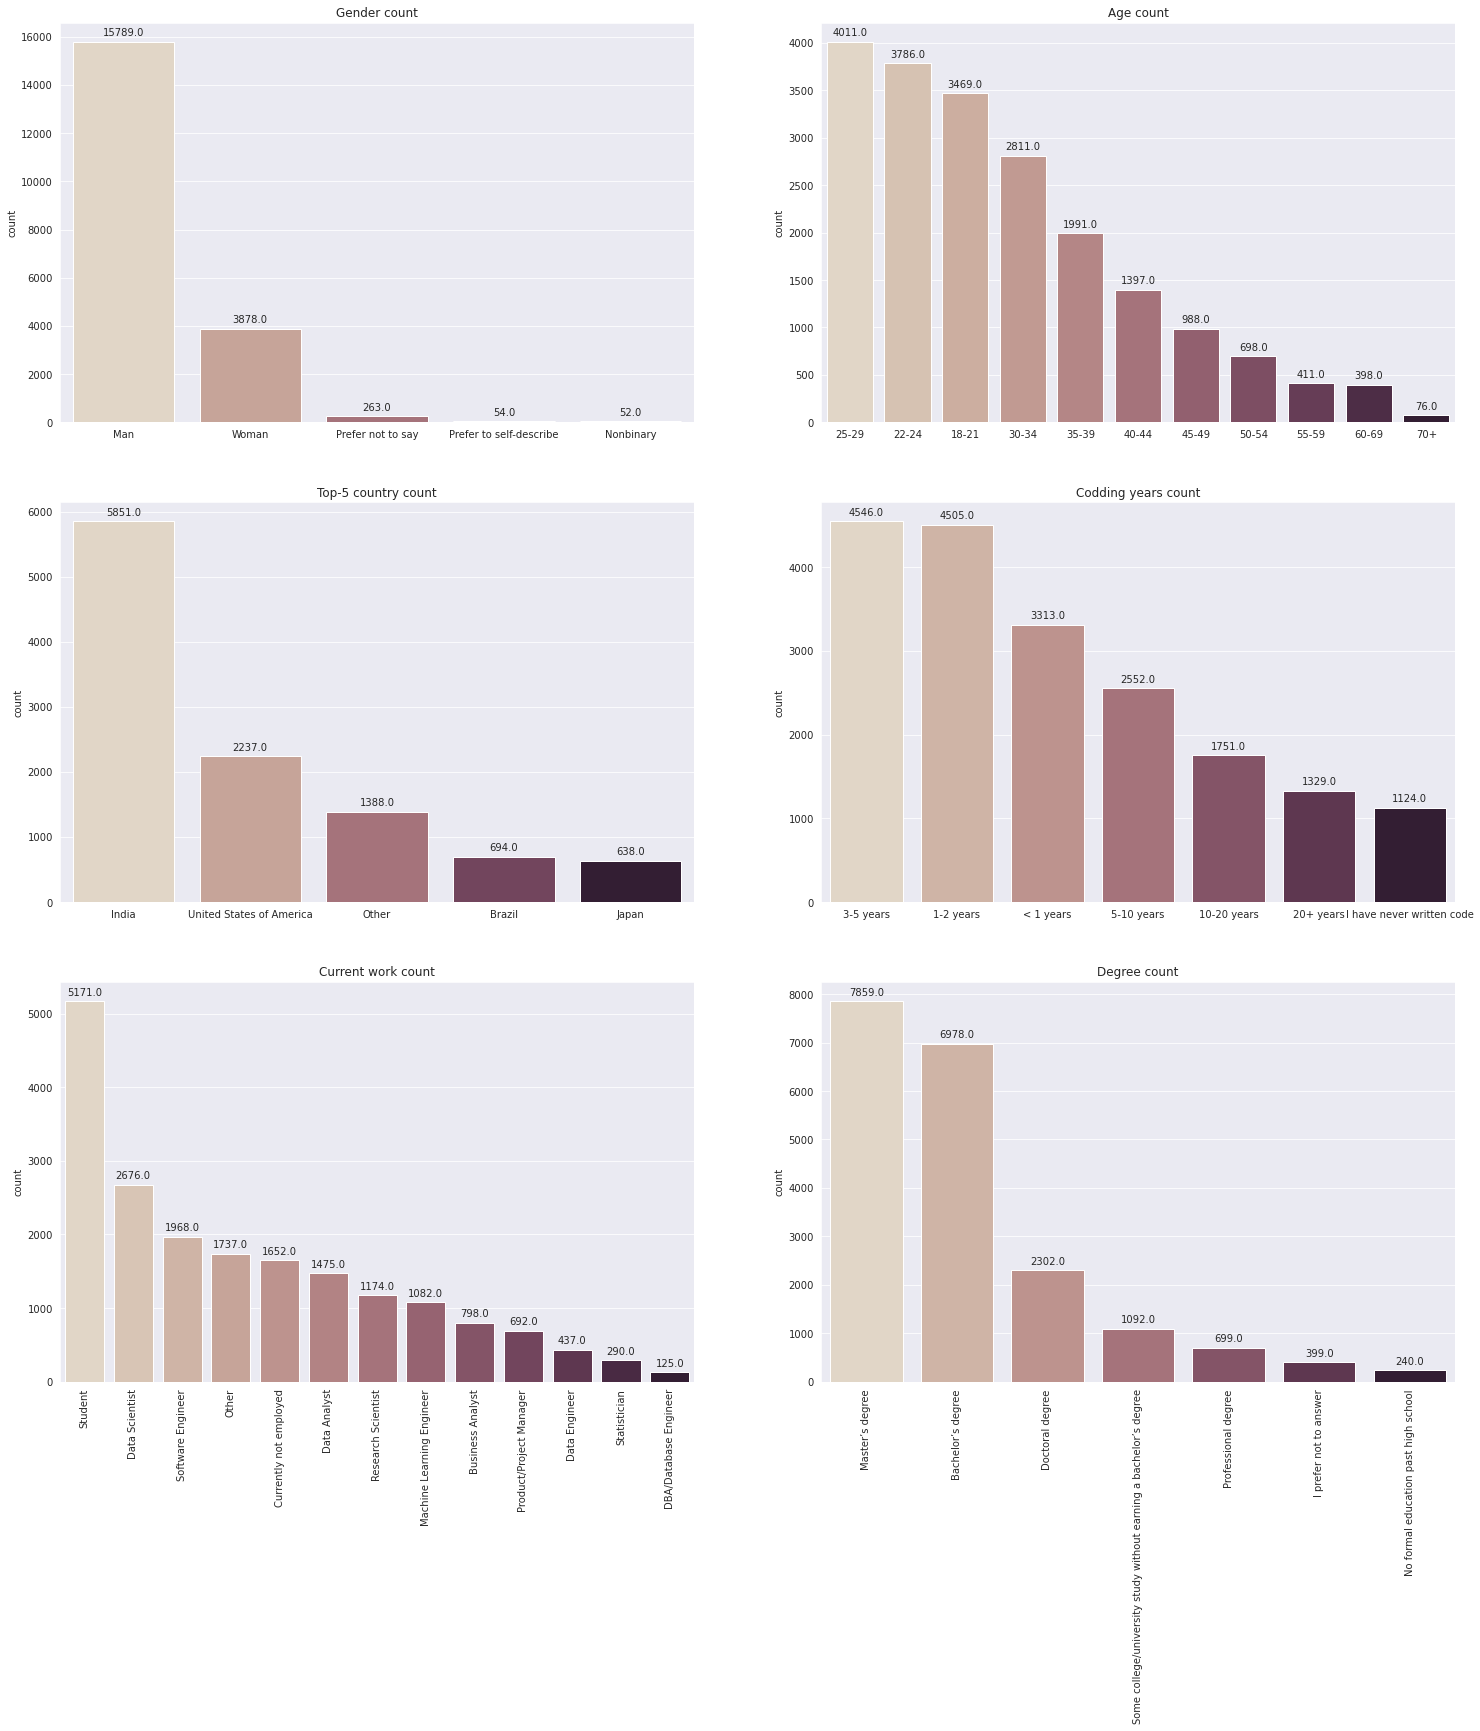

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(25,25))

# Gender
Q2_count = data.Q2.value_counts().sort_values(ascending=False).to_frame()
Q2_count = Q2_count.rename(columns={'Q2': 'count'})
ax[0,0] = sns.barplot(x=Q2_count.index, y='count', data=Q2_count,  palette="ch:.25", ax=ax[0,0])
for p in ax[0,0].patches:
    ax[0,0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[0,0] = ax[0,0].set_title('Gender count')


# Age
Q1_count = data.Q1.value_counts().sort_values(ascending=False).to_frame()
Q1_count = Q1_count.rename(columns={'Q1': 'count'})
ax[0,1] = sns.barplot(x=Q1_count.index, y='count', data=Q1_count,  palette="ch:.25", ax=ax[0,1])
for p in ax[0,1].patches:
    ax[0,1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[0,1] = ax[0,1].set_title('Age count')

# Country
Q3_count = data.Q3.value_counts().sort_values(ascending=False).to_frame()[:5]
Q3_count = Q3_count.rename(columns={'Q3': 'count'})
ax[1,0] = sns.barplot(x=Q3_count.index, y='count', data=Q3_count,  palette="ch:.25", ax=ax[1,0])
for p in ax[1,0].patches:
    ax[1,0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[1,0] = ax[1,0].set_title('Top-5 country count')

# Degree
Q4_count = data.Q4.value_counts().sort_values(ascending=False).to_frame()
Q4_count = Q4_count.rename(columns={'Q4': 'count'})
ax[2,1] = sns.barplot(x=Q4_count.index, y='count', data=Q4_count,  palette="ch:.25", ax=ax[2,1])
for p in ax[2,1].patches:
    ax[2,1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels(), rotation=90)
ax[2,1] = ax[2,1].set_title('Degree count')

# Current work
Q5_count = data.Q5.value_counts().sort_values(ascending=False).to_frame()
Q5_count = Q5_count.rename(columns={'Q5': 'count'})
ax[2,0] = sns.barplot(x=Q5_count.index, y='count', data=Q5_count,  palette="ch:.25", ax=ax[2,0])
for p in ax[2,0].patches:
    ax[2,0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=90)
ax[2,0] = ax[2,0].set_title('Current work count')

# Codding
Q6_count = data.Q6.value_counts().sort_values(ascending=False).to_frame()
Q6_count = Q6_count.rename(columns={'Q6': 'count'})
ax[1,1] = sns.barplot(x=Q6_count.index, y='count', data=Q6_count,  palette="ch:.25", ax=ax[1,1])
for p in ax[1,1].patches:
    ax[1,1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[1,1] = ax[1,1].set_title('Codding years count')

<font size="3"> Well, let's explore only for men and women educations (Q4), bcs that group (consist from men and women) is the most popular: </font>

It can be seen from the gender graph that most of them consider themselves either men or women. At the moment I would like to focus on these generators, since the rest against their background are quantitatively lost.

In [5]:
q4_degree_man = data.Q4.loc[data.Q2 == 'Man'].value_counts().to_frame()
q4_degree_woman = data.Q4.loc[data.Q2 == 'Woman'].value_counts().to_frame()

Q4_count = data.Q4.loc[(data.Q2 == 'Man') | (data.Q2 == 'Woman')].value_counts().sort_values(ascending=False).to_frame()

Q4_count = Q4_count.rename(columns={'Q4': 'count'})
Q4_count = Q4_count.drop(['Some college/university study without earning a bachelor’s degree', 
                          'I prefer not to answer', 'No formal education past high school'], axis=0)

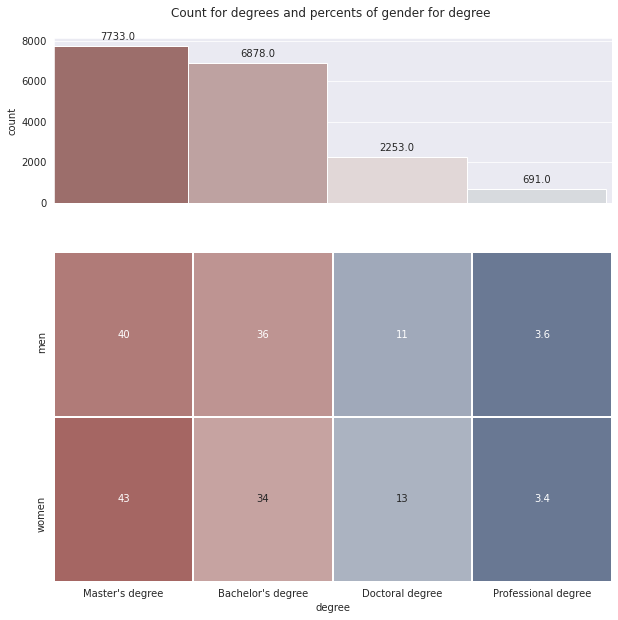

In [6]:
cmap = sns.diverging_palette(250, 15, 30, as_cmap=True)

f, (ax_bar, ax_heatmap) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (5, 10)},  figsize=(10,10))
ax_bar = sns.barplot(x=Q4_count.index, y='count', data=Q4_count,  palette=sns.diverging_palette(15, 250, 30), ax=ax_bar)
ax_bar.set_xticklabels('')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width + new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax_bar, 1)
for p in ax_bar.patches:
    ax_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax_bar.set(title='Count for degrees and percents of gender for degree \n')

# heatmap
percents_women = [(q4_degree_woman.Q4[0]/q4_degree_woman.sum()*100)[0], (q4_degree_woman.Q4[1]/q4_degree_woman.sum()*100)[0],
                 (q4_degree_woman.Q4[2]/q4_degree_woman.sum()*100)[0], (q4_degree_woman.Q4[4]/q4_degree_woman.sum()*100)[0]]
percents_men = [(q4_degree_man.Q4[0]/q4_degree_man.sum()*100)[0], (q4_degree_man.Q4[1]/q4_degree_man.sum()*100)[0],
               (q4_degree_man.Q4[2]/q4_degree_man.sum()*100)[0], (q4_degree_man.Q4[4]/q4_degree_man.sum()*100)[0]]
index_name = ["Master's degree", "Bachelor's degree", "Doctoral degree", "Professional degree"]
percents_degrees = pd.DataFrame({'men': percents_men, 'women': percents_women, 'degree': index_name})
percents_degrees = percents_degrees.set_index('degree')

ax_heatmap = sns.heatmap(percents_degrees.T, cmap=cmap, annot=True, linewidths=1.2, cbar=False, ax=ax_heatmap)


More women with masters and doctorates :) 

And ~40% of kagglers are masters, it's a very nice result! 

I would also note that masters are understood as people who either have a master's degree or will receive it within the next two years. 
Let's explore them:

## See statistics for masters and not-masters:

### Age:

In fact, age can tell a lot: is a person currently studying for a master's degree or how long ago did he graduate from it? Perhaps this feature can somehow influence the choice of profession, programming languages, experience in using algorithms and the choice in favor of a particular field of data science.

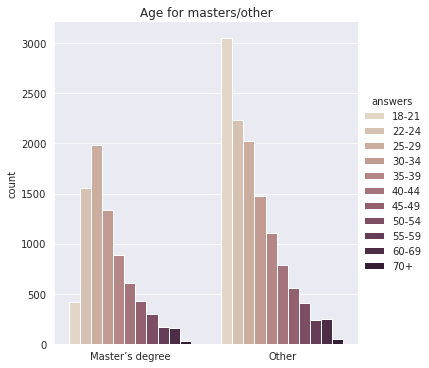

In [7]:
q1_age_ms = data.Q1.loc[data.Q4 == 'Master’s degree'].value_counts().to_frame()
q1_age_not = data.Q1.loc[data.Q4 != 'Master’s degree'].value_counts().to_frame()

plot_frame = pd.DataFrame({'Master’s degree': q1_age_ms.Q1, 'Other': q1_age_not.Q1})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="Master’s degree", value_name="Other")
sns.factorplot(x='Master’s degree', y='Other', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Age for masters/other')

Expected result: the largest age group of masters is 25-29. These are exactly those people who have just finished their master's degree or are in the process of completing it.

We can also see that the distributions of the ages of the masters and the ages of other users look quite similar. Is it really?


<font size="3"> **Let's see how much different age distributions are for master users and everyone else?** </font>

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Age for masters and other')]

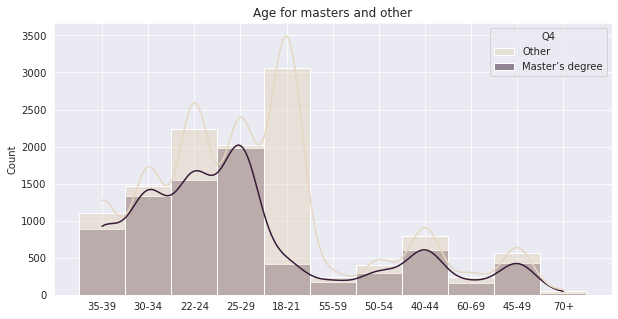

In [8]:
hist_data = data.copy()
hist_data.Q4.loc[hist_data.Q4 != 'Master’s degree'] = 'Other'
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(hist_data, x="Q1", kde=True, hue='Q4', palette="ch:.25")
ax.set(title='Age for masters and other', xlabel='')

In cases where we need to compare how similar two distributions are, statistical tests come to the rescue.
There are actually a huge number of them and an overview of all deserves a separate kernel. Here I will focus on the choice between the Student's t test and the Mann-Whitney test.

They differ in that the correct variance in the samples is required for the correctness of the Student's test, while the Mann-Whitney test does not. Therefore, we first check the variances:

In [9]:
from sklearn import preprocessing


le_o = preprocessing.LabelEncoder().fit(data.Q1.loc[data.Q4 != 'Master’s degree'])
others = le_o.transform(data.Q1.loc[data.Q4 != 'Master’s degree'])

le_m = preprocessing.LabelEncoder().fit(data.Q1.loc[data.Q4 == 'Master’s degree'])
masters = le_m.transform(data.Q1.loc[data.Q4 == 'Master’s degree'])

In [10]:
print('Variance for "other": ', np.var(others))
print('Variance for "masters": ', np.var(masters))

Variance for "other":  5.572292197248881
Variance for "masters":  4.433870112533893


Well, variances are not equal. It means that we can't use t-student test. **Let's use another - Mann-Whitney test:**


Any statistical test is a hypothesis test - null and alternative. In our case, they look like this:

$H_0$: distributions are equal;
<br>
$H_1$: distributions are not equal;

In [11]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(hist_data.Q1.loc[hist_data.Q4 == 'Other'].value_counts().to_list(), hist_data.Q1.loc[hist_data.Q4 == 'Master’s degree'].value_counts().to_list())
print('p-value is: ', p)

p-value is:  0.19665081967530756


**Our p-value > 0.05. It means, that we can't reject $H_0$ and we can not conclude that a significant difference exists.**

Indeed, the only major difference is for the interval 18-21, otherwise it is a coincidence.

### Work:

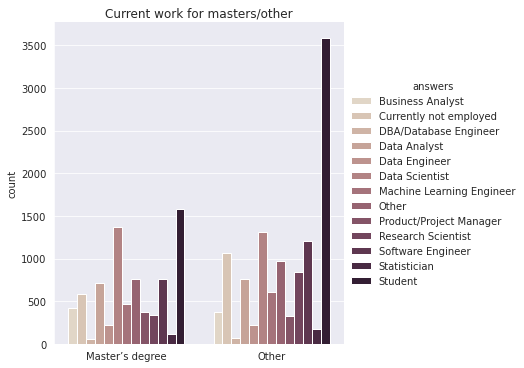

In [12]:
q5_work_ms = data.Q5.loc[data.Q4 == 'Master’s degree'].value_counts().to_frame()
q5_work_not = data.Q5.loc[data.Q4 != 'Master’s degree'].value_counts().to_frame()

plot_frame = pd.DataFrame({'Master’s degree': q5_work_ms.Q5, 'Other': q5_work_not.Q5})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="Master’s degree", value_name="Other")
sns.factorplot(x='Master’s degree', y='Other', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Current work for masters/other')

It is expected that most of the masters are still students (20%), may be they study at graduate school.

A lot of masters have a work, the most popular is DS (17%). 

The most unpopular work is DBA/Database Engineer - 0.7%! And a lot of masters have work not in list - 9.8%.

<font size="3"> **Let's see how much different work distributions are for master users and everyone else?** </font>

I think, they haven't significant difference, check it:

In [13]:
stat, p = mannwhitneyu(hist_data.Q5.loc[hist_data.Q4 == 'Other'].value_counts().to_list(), hist_data.Q5.loc[hist_data.Q4 == 'Master’s degree'].value_counts().to_list())
print('p-value is: ', p)

p-value is:  0.22087816371245977


Our p-value > 0.05. It means, that we can't reject  $𝐻_0$  and we cannot conclude that a significant difference exists.

<font size="3"> **Is there any dependence between current work and age for masters?** </font>

I will use spearman for checking that.

$H_0$: two samples are independent;

$H_1$: there is a dependency between samples.

In [14]:
from scipy.stats import spearmanr
from sklearn import preprocessing

hist_data = hist_data.loc[hist_data.Q4 == 'Master’s degree']
hist_data[['Q1','Q5']] = hist_data[['Q1','Q5']].fillna('No answer')

le_1 = preprocessing.LabelEncoder().fit(hist_data['Q1'])
hist_data['Q1'] = le_1.transform(hist_data['Q1'])


hist_data.Q5 = hist_data.Q5.fillna('No answer')
le_5 = preprocessing.LabelEncoder().fit(hist_data['Q5'])
hist_data['Q5'] = le_5.transform(hist_data['Q5'])


corr, p  = spearmanr(hist_data.Q1, hist_data.Q5)
print('p-value is ', p)
print('corr is ', corr)

p-value is  7.115535863363654e-114
corr is  -0.25173994511425796


**Our p-value < 0.05. It means, that we can reject  $𝐻_0$  and we can conclude that a significant difference exists.**


### Years of codding

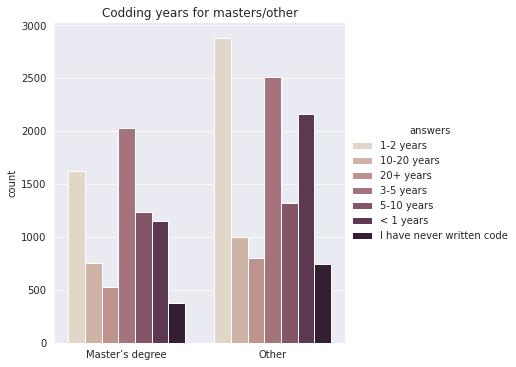

In [15]:
q6_codding_ms = data.Q6.loc[data.Q4 == 'Master’s degree'].value_counts().to_frame()
q6_codding_not = data.Q6.loc[data.Q4 != 'Master’s degree'].value_counts().to_frame()

plot_frame = pd.DataFrame({'Master’s degree': q6_codding_ms.Q6, 'Other': q6_codding_not.Q6})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="Master’s degree", value_name="Other")
sns.factorplot(x='Master’s degree', y='Other', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Codding years for masters/other')

The most of masters write code from 3 to 5 years. Explore dependences for that feature:

<font size="3"> **Is there any dependence between current work and years of codding for masters?** </font>


$H_0$: two samples are independent;

$H_1$: there is a dependency between samples.

In [16]:
hist_data = data.loc[data.Q4 == 'Master’s degree'].copy()
hist_data[['Q6','Q5']] = hist_data[['Q6','Q5']].fillna('No answer')

le_1 = preprocessing.LabelEncoder().fit(hist_data['Q6'])
hist_data['Q6'] = le_1.transform(hist_data['Q6'])


hist_data.Q5 = hist_data.Q5.fillna('No answer')
le_5 = preprocessing.LabelEncoder().fit(hist_data['Q5'])
hist_data['Q5'] = le_5.transform(hist_data['Q5'])


corr, p  = spearmanr(hist_data.Q5, hist_data.Q6)
print('p-value is ', p)
print('corr is ', corr)

p-value is  0.13554321392211024
corr is  -0.016838238564074598


**Our p-value > 0.05. It means, that we can reject  $H_0$  and we can not conclude that a significant difference exists.**

But we have correlation -0.016, this indicates the presence of a linear relationship between the signs. Let's see ont he heatmap:

In [17]:
heatmap_data = data.loc[data.Q4 == 'Master’s degree'].copy()

In [18]:
df_q5q6 = []
for year in heatmap_data.Q6.value_counts().index.to_list():
    df_q5q6.append(heatmap_data.Q5.loc[heatmap_data.Q6 == str(year)].value_counts().to_frame().rename(columns={'Q5':str(year)}))
res_q5q6 = pd.concat(df_q5q6, axis=1)

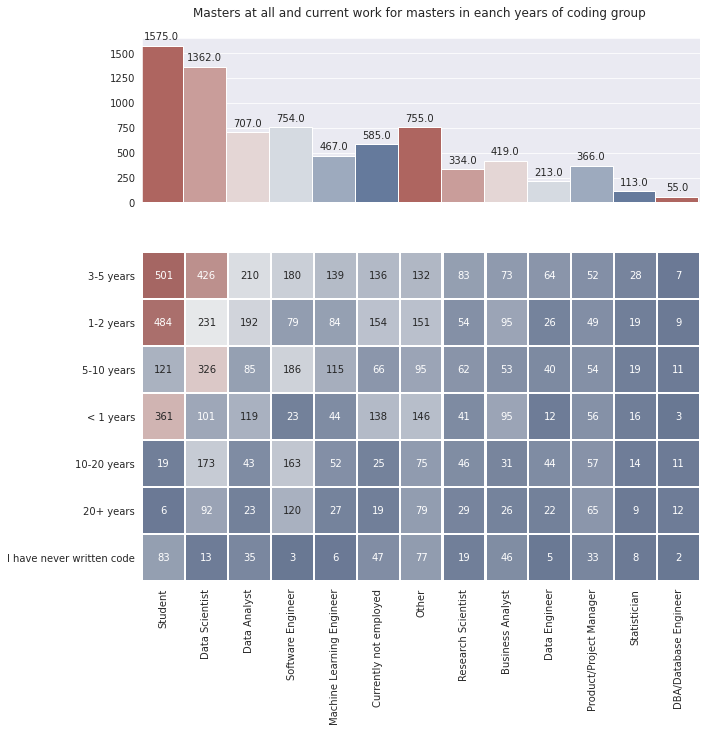

In [19]:
f, (ax_bar, ax_heatmap) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (5, 10)},  figsize=(10,10))
x_bar = res_q5q6.sum(axis=1).sort_values(ascending=False)
ax_bar = sns.barplot(x=x_bar.index, y=res_q5q6.sum(axis=1), data=res_q5q6,  palette=sns.diverging_palette(15, 250, 50), ax=ax_bar)
ax_bar.set_xticklabels('')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width + new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax_bar, 1)
for p in ax_bar.patches:
    ax_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax_bar.set(title='Masters at all and current work for masters in eanch years of coding group \n')

# heatmap
ax_heatmap = sns.heatmap(res_q5q6.T, cmap=cmap, linewidths=1.2, cbar=False, annot=True, fmt='g', ax=ax_heatmap)

Most beginner coding kagglers (<1 year) choose professions DS, DA and BA from IT-word, a lot of begginers are students (it is expected) or currently not employed and many responded that they had jobs not from the list of proposed ones.

More than half of DS have been programming before the age of 10, it seems that Data Scientists are quite a young profession.

The "oldest" profession - Software Engineer, DBA and Project/Product Manager (10+ years of coding).


<font size='3'> **Let's explore only data jobs for masters:** </font>

Age: 18-39
<br>
Years of codding: <20 years

In [20]:
import plotly.express as px

data_jobs = ['Statistican', 'Data Engineer', 'Research Scientist', 'Data Analyst', 'Data Scientist', 'Machine Learning Engineer']
age_group = ['30-34', '25-29', '22-24', '35-39', '18-21']
codding_years = ['5-10 years', '<1 years', '1-2 years', '3-5 years', '10-20 years']
fig = px.parallel_categories(data.loc[data.Q5.isin(data_jobs) & data.Q1.isin(age_group) & data.Q6.isin(codding_years)], dimensions=['Q5', 'Q1', 'Q6'],
                
                labels={'Q5':'Job title', 'Q1':'Age group', 'Q6':'Years of coding'})
fig.show()


First, we see that aspiring specialists are really moving into the field of data analysis. Also, I would note that it is very strange to see people aged 18-21 who have programming experience for 10 years :)
<br>
Most of the data scientists are in the 25-35 age group and their programming experience is from 3 to 10 years, that is, they cannot be called beginners. It will probably take a lot of work to become data scientists. It seems that a master's degree is required in the first place for a data scientist. Let's check this hypothesis just in case.

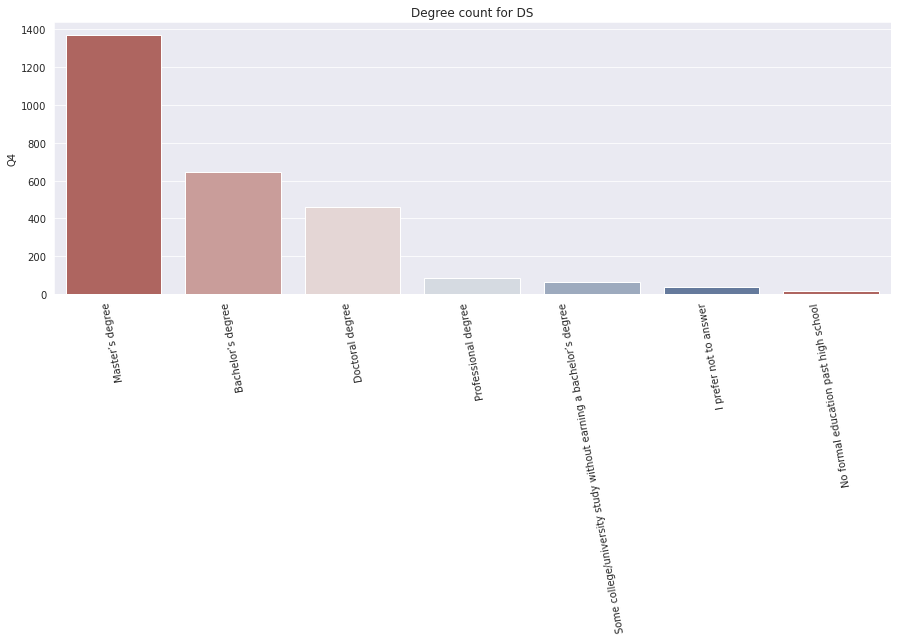

In [21]:
data_ds = data.Q4.loc[data.Q5 == 'Data Scientist']

fig, ax = plt.subplots(figsize=(15,5))

ax_bar = sns.barplot(x=data_ds.value_counts().index, y=data_ds.value_counts(), data=data_ds,  palette=sns.diverging_palette(15, 250, 50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=100)
ax = ax.set_title('Degree count for DS')

Indeed, most of the data-valued have or are receiving a master's degree.

<font size="3"> **Is there any dependence between current work and years of codding for all users?** </font>

In [22]:
hist_data = data.copy()
hist_data[['Q6','Q5']] = hist_data[['Q6','Q5']].fillna('No answer')

le_1 = preprocessing.LabelEncoder().fit(hist_data['Q6'])
hist_data['Q6'] = le_1.transform(hist_data['Q6'])


hist_data.Q5 = hist_data.Q5.fillna('No answer')
le_5 = preprocessing.LabelEncoder().fit(hist_data['Q5'])
hist_data['Q5'] = le_5.transform(hist_data['Q5'])


corr, p  = spearmanr(hist_data.Q5, hist_data.Q6)
print('p-value is ', p)
print('corr is ', corr)

p-value is  5.279815652611784e-21
corr is  -0.06636363526844706


**Our p-value < 0.05. It means, that we can reject  $𝐻_0$  and we can conclude that a significant difference exists.**

### <center> Conclusions for basic part </center>

<table>
<thead>
<tr><th>Hypothesis</th><th>Result</th></tr>
</thead>
<tbody>
<tr><td>Are different age distributions for master users and everyone else?</td><td> We can not conclude that a significant difference exists.</td></tr>
<tr><td>Are different work distributions for master users and everyone else?</td><td> We can not conclude that a significant difference exists.</td></tr> <tr>
<tr><td>Is there any dependence between current work and age for masters?</td><td> There is a dependency between samples. </td></tr> <tr>
<tr><td>Is there any dependence between current work and years of codding for masters?</td><td> We can not conclude that a significant difference exists. </td></tr>
<tr><td>Is there any dependence between current work and years of codding for all users?</td><td>We can conclude that a significant difference exists.</td></tr>
</tbody>
</table>


# Programming part

It is Q7 question. We have in data 13 columns for Q7, each column for each answer type.

In [23]:
q7_columns = [data.Q7_Part_1,data.Q7_Part_2,data.Q7_Part_3,data.Q7_Part_4,
             data.Q7_Part_5,data.Q7_Part_6,data.Q7_Part_7,data.Q7_Part_8,
             data.Q7_Part_9, data.Q7_Part_10, data.Q7_Part_11, data.Q7_Part_12,
             data.Q7_OTHER]
Q7_data = pd.concat(q7_columns)

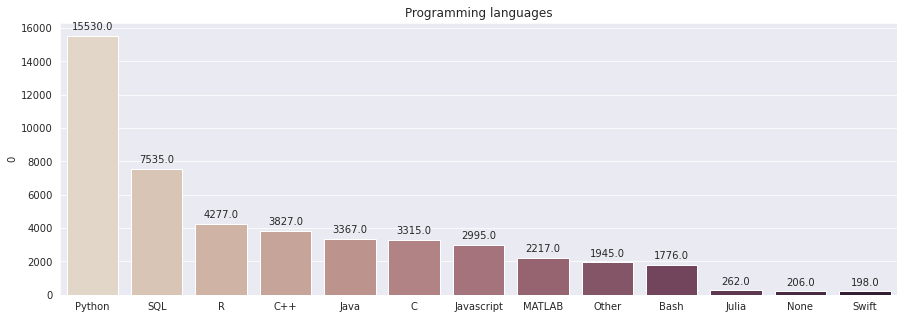

In [24]:
Q7_count = Q7_data.value_counts().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,5))
ax = sns.barplot(x=Q7_count.index, y=Q7_count.iloc[:,0], data=Q7_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Programming languages')

I have an assumption that depending on the specialty, different tools are used (which is expected) and these tools also depend on the "youth" of the profession. Let's explore this aspect:

## Explore programming languages for each type of degree:

In [25]:
q7_names = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10',
            'Q7_Part_11', 'Q7_Part_12','Q7_OTHER']

In [26]:
def create_column(df):
    df = df.dropna(how='all')
    df['Q7'] = None
    df = df.fillna(0)
    for q7_col in q7_names:
        df['Q7'] += df[q7_col]
    return df

In [27]:
def get_row(df, degree):
    degree = str(degree)
    df = df.Q7.T.to_frame()
    df = df.rename(columns={'Q7': degree})
    return df

In [28]:
def create_df_Q7(df, degree):
    degree = str(degree)
    df = df.loc[df.Q4 == degree]
    df = df[q7_names].apply(pd.Series.value_counts)
    df = create_column(df)
    df = get_row(df, degree)
    return df

In [29]:
result_degree = []
for degree in data.Q4.value_counts().index.to_list():
    result_degree.append(create_df_Q7(data, degree).T)

df_degree = pd.concat(result_degree)
result_q7 = df_degree.drop('None', axis=1)


In [30]:
(result_q7.T
 .style
 .highlight_max(color='indianred')
 .highlight_min(color='lightpink')
)

,Master’s degree,Bachelor’s degree,Doctoral degree,Some college/university study without earning a bachelor’s degree,Professional degree,I prefer not to answer,No formal education past high school
Bash,762.000000,471.000000,358.000000,83.000000,57.000000,21.000000,24.000000
C,1077.000000,1470.000000,372.000000,213.000000,97.000000,62.000000,24.000000
C++,1253.000000,1646.000000,445.000000,273.000000,111.000000,68.000000,31.000000
Java,1264.000000,1363.000000,315.000000,228.000000,111.000000,56.000000,30.000000
Javascript,1081.000000,1218.000000,243.000000,230.000000,117.000000,62.000000,44.000000
Julia,104.000000,64.000000,61.000000,13.000000,11.000000,6.000000,3.000000
MATLAB,883.000000,611.000000,533.000000,74.000000,74.000000,32.000000,10.000000
Other,834.000000,582.000000,255.000000,118.000000,94.000000,39.000000,23.000000
Python,6342.000000,5626.000000,1834.000000,826.000000,499.000000,255.000000,148.000000
R,2123.000000,1075.000000,717.000000,133.000000,155.000000,52.000000,22.000000


Everyone loves Python :) The most unpopular are Swift and Julia.

But so far this information does not tell us anything. Therefore, let's look at it in the context of other features.

## Any dependence btw coding years and programming languages?

In [31]:
def create_df_Q6(df, years):
    years = str(years)
    df = df.loc[(df.Q4 == 'Master’s degree') & (df.Q6 == years)]
    df = df[q7_names].apply(pd.Series.value_counts)
    df = create_column(df)
    df = get_row(df, years)
    return df

In [32]:
result_years = []
for year in data.Q6.value_counts().index.to_list():
    result_years.append(create_df_Q6(data, year).T)

df_years = pd.concat(result_years)
df_years = df_years.drop('None', axis=1)
df_years = df_years.drop('I have never written code', axis=0)

In [33]:
sns.set_palette(palette=sns.color_palette("cubehelix",15))

**<center> <font size="5"> Top programming languages 2020 (TIOBE) </font> </center>**

<br>
<br>

<center> <img src='https://www.cleveroad.com/images/article-previews/6af294a5e19e416faf22baf35c2aa7bbc3ce0859bdbcb9b48a7bbb19107b7c70.png' style="width: 500px"/> </center>

<center><font size="0.5"> source: https://www.cleveroad.com/blog/programming-languages-ranking </font></center>

**What about users with master's degree on kaggle?**

Text(0, 0.5, 'Programming languages (%)')

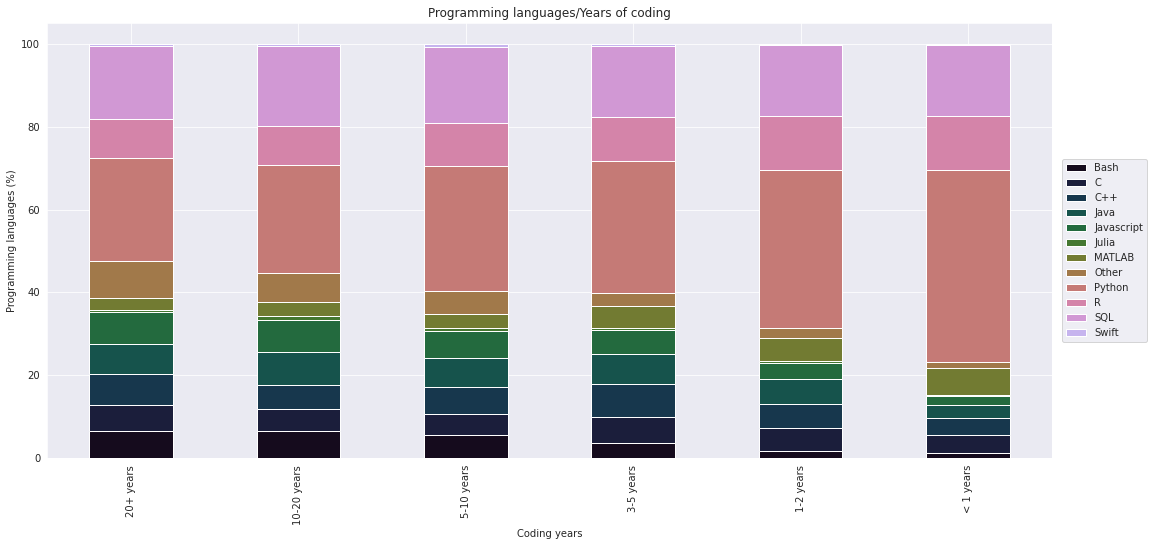

In [34]:
df_years.T.transpose().apply(lambda x: x*100/sum(x), axis=1).sort_values(by='Python').plot(kind="bar", stacked=True, figsize=(18,8)).legend(bbox_to_anchor=(1.1, 0.7))
plt.title("Programming languages/Years of coding")
plt.xlabel("Coding years")
plt.ylabel("Programming languages (%)")

Among newcomers-masters to programming, the largest percentage of people using Python and R. Indeed, it is a fairly simple language to learn to program. The more experience a person has, the greater the percentage of Bash and JS used. Novice programmers also use MATLAB more. Most likely, this is due to the fact that they are still at the university, where MATLAB is the main tool for research. People with more than 1 year experience have almost the same percentage of using Java and C ++, perhaps this is due to the fact that these languages are traditionally studied as a basis. Also, the more experience a person has, the greater the percentage of using other programming languages. And regardless of experience, everyone often uses SQL ;)

## The most popular language for each job type

In [35]:
def create_df_Q4(df,job_title):
    job_title = str(job_title)
    df = df.loc[(df.Q4 == 'Master’s degree') & (df.Q5 == job_title)]
    df = df[q7_names].apply(pd.Series.value_counts)
    df = create_column(df)
    df = get_row(df, job_title)
    return df

result_jobs = []
for job in data.Q5.value_counts().index.to_list():
    result_jobs.append(create_df_Q4(data, job).T)

df_jobs = pd.concat(result_jobs)
df_jobs = df_jobs.drop('None', axis=1)
df_jobs = df_jobs.fillna(0)

Create a count table again with min-max higlighting:

In [36]:
(df_jobs.T
 .style
 .highlight_max(color='indianred')
 .highlight_min(color='lightpink')
)

,Student,Data Scientist,Software Engineer,Other,Currently not employed,Data Analyst,Research Scientist,Machine Learning Engineer,Business Analyst,Product/Project Manager,Data Engineer,Statistician,DBA/Database Engineer
Bash,77.000000,210.000000,135.000000,61.000000,29.000000,37.000000,34.000000,82.000000,11.000000,30.000000,41.000000,4.000000,11.000000
C,376.000000,92.000000,144.000000,80.000000,75.000000,53.000000,61.000000,82.000000,27.000000,44.000000,26.000000,10.000000,7.000000
C++,396.000000,134.000000,186.000000,86.000000,83.000000,64.000000,70.000000,120.000000,28.000000,50.000000,22.000000,8.000000,6.000000
Java,311.000000,149.000000,308.000000,76.000000,60.000000,42.000000,60.000000,97.000000,35.000000,65.000000,45.000000,4.000000,12.000000
Javascript,163.000000,133.000000,317.000000,78.000000,55.000000,76.000000,42.000000,73.000000,36.000000,59.000000,35.000000,5.000000,9.000000
Julia,21.000000,33.000000,5.000000,6.000000,2.000000,6.000000,11.000000,9.000000,1.000000,2.000000,5.000000,2.000000,1.000000
MATLAB,283.000000,118.000000,58.000000,74.000000,88.000000,47.000000,56.000000,61.000000,31.000000,35.000000,20.000000,12.000000,0.000000
Other,70.000000,132.000000,213.000000,98.000000,35.000000,68.000000,28.000000,39.000000,47.000000,42.000000,36.000000,17.000000,9.000000
Python,1345.000000,1267.000000,595.000000,555.000000,474.000000,549.000000,272.000000,446.000000,281.000000,260.000000,187.000000,67.000000,44.000000
R,414.000000,546.000000,77.000000,176.000000,134.000000,253.000000,98.000000,64.000000,145.000000,69.000000,49.000000,87.000000,11.000000


**What about users with master's degree on kaggle?**

Text(0, 0.5, 'Programming languages (%)')

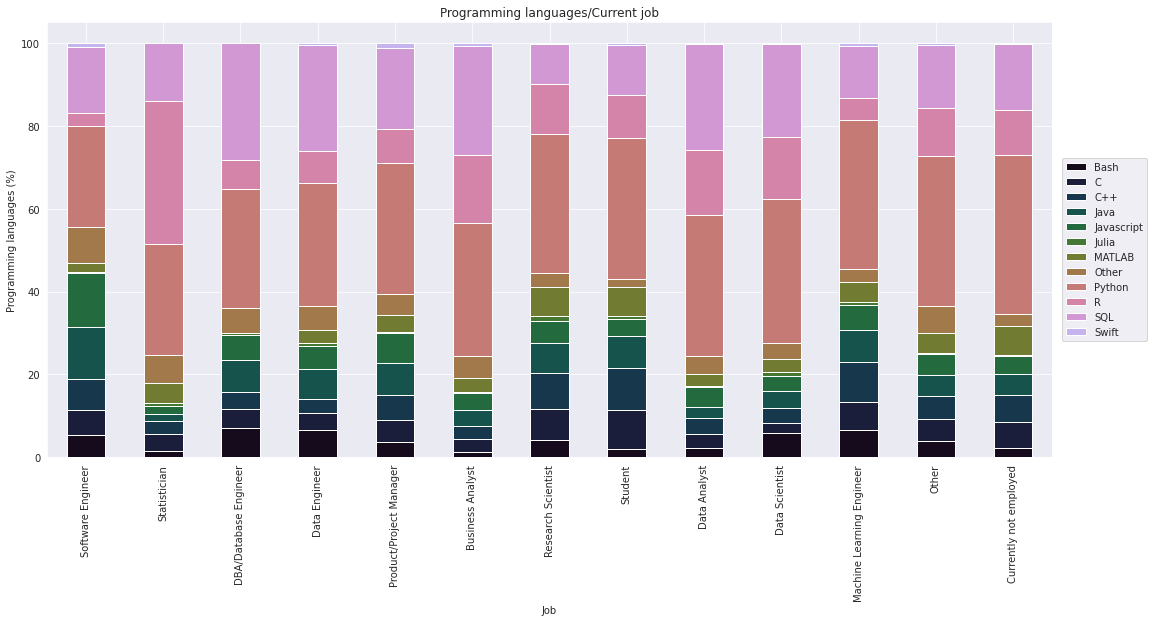

In [37]:
df_jobs.T.transpose().apply(lambda x: x*100/sum(x), axis=1).sort_values(by='Python').plot(kind="bar", stacked=True, figsize=(18,8)).legend(bbox_to_anchor=(1.1, 0.7))
plt.title("Programming languages/Current job")
plt.xlabel("Job")
plt.ylabel("Programming languages (%)")

What does this plot tell us?

First, I will note once again that we are only considering users who have either received or will receive a master's degree within the next 2 years.

Consider technology stacks. First, we see that the stack for ML Engineer and Research Scientist is very similar to Software Engineer. Perhaps they are united by a variety of tasks. Engineers design software solutions, RS tries various solutions. Accordingly, the larger the technology stack, the more productive the work.

Also, Data Scientists and Data Analytics are very similar to each other. Indeed, these are two adjacent directions. A good data scientist is also a good data analyst!

The DBA and the Data Engineer obviously need to know roughly the same things - SQL, basically.

I would also note an important point: we are considering only users of the Kaggle platform, therefore Python is the leader in programming languages for absolutely all professions.

# Work in process ...